# Pandas Basics <hr style="border:2.5px solid #Ffc0cb"></hr> 

Data Analyst: Vince Raineir Casaclang <br>
Department: Electrical Engineering

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# DataFrame

In [3]:
data = {
    "name":['Vince', 'Raineir', 'Cassy'],
    "age":[19,20,21],
    "sex":['M', 'M', 'F']
}
data

{'name': ['Vince', 'Raineir', 'Cassy'],
 'age': [19, 20, 21],
 'sex': ['M', 'M', 'F']}

In [4]:
df = pd.DataFrame(data)
df

,name,age,sex
0,Vince,19,M
1,Raineir,20,M
2,Cassy,21,F


In [5]:
df['age']

0    19
1    20
2    21
Name: age, dtype: int64

In [6]:
df['age'].sum()

60

In [7]:
df['age'].mean()

20.0

In [8]:
df['name']

0      Vince
1    Raineir
2      Cassy
Name: name, dtype: object

In [9]:
df['sex']

0    M
1    M
2    F
Name: sex, dtype: object

# Correlation

In [10]:
measurements = {
    "current":[2,3.5,1.8,4.2,2.7],
    "power":[100,200,90,210,110]
}
measurements

{'current': [2, 3.5, 1.8, 4.2, 2.7], 'power': [100, 200, 90, 210, 110]}

In [11]:
device = pd.DataFrame(measurements)
device

,current,power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [12]:
device.cov()

,current,power
current,1.023,56.15
power,56.150,3370.00


In [13]:
device.corr()

,current,power
current,1.000000,0.956306
power,0.956306,1.000000


In [14]:
device.describe()

,current,power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


In [15]:
animals = {
    "jaguar":[10.6,9.1,9.3,9.8,10.5,10.4,9.5,11,10.4,3,9.8],
    "panther":[10.1,11,9.1,20,9.2,10.8,9.9,9.2,9.1,9.1, np.nan]
           
           }
animals


{'jaguar': [10.6, 9.1, 9.3, 9.8, 10.5, 10.4, 9.5, 11, 10.4, 3, 9.8],
 'panther': [10.1, 11, 9.1, 20, 9.2, 10.8, 9.9, 9.2, 9.1, 9.1, nan]}

In [16]:
df = pd.DataFrame(animals)
df

,jaguar,panther
0,10.6,10.1
1,9.1,11.0
2,9.3,9.1
3,9.8,20.0
4,10.5,9.2
5,10.4,10.8
6,9.5,9.9
7,11.0,9.2
8,10.4,9.1
9,3.0,9.1


## Scatter Plot

In [ ]:
device['current']


0    2.0
1    3.5
2    1.8
3    4.2
4    2.7
Name: current, dtype: float64

In [ ]:
device['power']

0    100
1    200
2     90
3    210
4    110
Name: power, dtype: int64

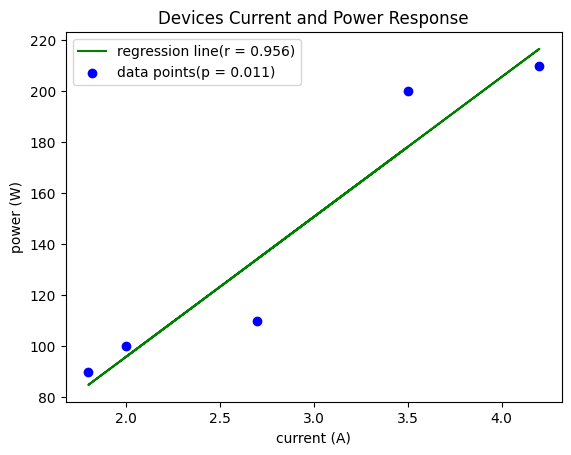

In [ ]:
x = device['current']
y = device['power']

# regression line
m, b, r,p,std_err = stats.linregress(x,y)
line = m*x + b

plt.plot(x,line,
         color='g',
         label= f'regression line(r = {r:.3f})')

#scatter
plt.scatter(x,y,
            color= 'b',
            label= f'data points(p = {p:.3f})')
plt.title('Devices Current and Power Response')
plt.ylabel('power (W)')
plt.xlabel('current (A)')
plt.legend()
plt.show()

# Resistance Test

In [25]:
resistance = pd.read_csv(r"resistance-test.csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [26]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 392.0 bytes


In [27]:
jag_mean = resistance['Jaguar'].mean()
jag_mean

9.399999999999999

In [28]:
pan_mean = resistance['Panther'].mean()
pan_mean

10.75

In [29]:
resistance['Panther'] = resistance['Panther'].fillna(pan_mean)
resistance['Panther']


0     10.10
1     11.00
2      9.10
3     20.00
4      9.20
5     10.80
6      9.90
7      9.20
8      9.10
9      9.10
10    10.75
Name: Panther, dtype: float64

In [30]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   11 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 392.0 bytes


# Bar Graph

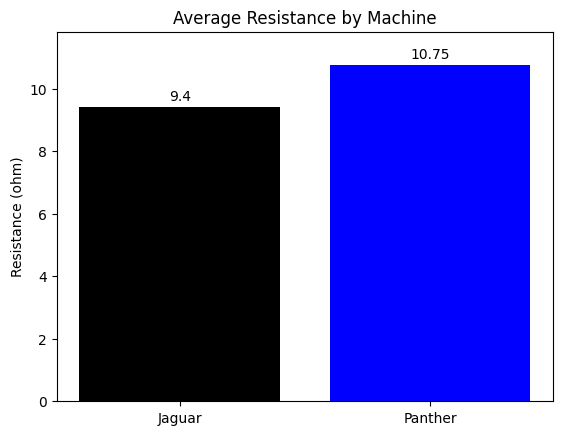

In [31]:
bars = plt.bar(['Jaguar','Panther'],[jag_mean , pan_mean],
               color=['Black','blue'])
plt.title('Average Resistance by Machine')
plt.ylabel('Resistance (ohm)')

#bar label
plt.bar_label(bars, padding=3)
plt.margins(y=0.1)

plt.show() 